**Proyek Analisis Data : E-Commerce Public Dataset**



*   Nama : Muhammad Fikri Ramadhan
*   Email : muh.fikriramadhan23@gmail.com
*   Id Dicoding : muhammad_fkriirmd23






**Menentukan Pertanyaan Bisnis**


*   Bagaimana performa penjualan dan revenue perusahaan dalam beberapa bulan terakhir?
*   Sistem pembayaran apa yang banyak digunakan pelanggan untuk melakukan transaksi?






In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### **Data Wrangling**

Tabel Customer

In [3]:
customers_df = pd.read_csv("https://raw.githubusercontent.com/mhmdfikrii/DicodingRepository/main/customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


Tabel Geolocation

In [4]:
geolocation_df = pd.read_csv("https://raw.githubusercontent.com/mhmdfikrii/DicodingRepository/main/geolocation_dataset.csv")
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


Tabel Order Items

In [5]:
orderitems_df = pd.read_csv("https://raw.githubusercontent.com/mhmdfikrii/DicodingRepository/main/order_items_dataset.csv")
orderitems_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


Tabel Order Payments

In [6]:
payments_df = pd.read_csv("https://raw.githubusercontent.com/mhmdfikrii/DicodingRepository/main/order_payments_dataset.csv")
payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


Tabel Order Review

In [7]:
review_df = pd.read_csv("https://raw.githubusercontent.com/mhmdfikrii/DicodingRepository/main/order_reviews_dataset.csv")
review_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


Tabel Order

In [8]:
order_df = pd.read_csv("https://raw.githubusercontent.com/mhmdfikrii/DicodingRepository/main/orders_dataset.csv")
order_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


Tabel Product Category

In [9]:
productcategory_df = pd.read_csv("https://raw.githubusercontent.com/mhmdfikrii/DicodingRepository/main/product_category_name_translation.csv")
productcategory_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


Tabel Product

In [10]:
product_df = pd.read_csv("https://raw.githubusercontent.com/mhmdfikrii/DicodingRepository/main/products_dataset.csv")
product_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


Tabel Seller

In [11]:
seller_df = pd.read_csv("https://raw.githubusercontent.com/mhmdfikrii/DicodingRepository/main/sellers_dataset.csv")
seller_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


# **Assessing Data**

### Menilai Data Customer `Customer_df()`

In [12]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [13]:
customers_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [14]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

Jumlah duplikasi:  0


In [15]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


### Menilai Data Geolocation `geolocation_df`

In [16]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [17]:
geolocation_df.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [18]:
print("Jumlah duplikasi: ", geolocation_df.duplicated().sum())

Jumlah duplikasi:  261831


In [19]:
geolocation_df.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


### Menilai Data Order Items `orderitems_df`

In [20]:
orderitems_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [21]:
orderitems_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [22]:
print("Jumlah duplikasi: ", orderitems_df.duplicated().sum())

Jumlah duplikasi:  0


In [23]:
orderitems_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


### Menilai Data Order Payments `payments_df`

In [24]:
payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [25]:
payments_df.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [26]:
print("Jumlah duplikasi: ", payments_df.duplicated().sum())

Jumlah duplikasi:  0


In [27]:
payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


### Menilai Data Order Review `review_df`

In [28]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [29]:
review_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [30]:
print("Jumlah duplikasi: ", review_df.duplicated().sum())

Jumlah duplikasi:  0


In [31]:
review_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


### Menilai Data Order `order_df`

In [32]:
order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [33]:
order_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [34]:
print("Jumlah duplikasi: ", order_df.duplicated().sum())

Jumlah duplikasi:  0


In [35]:
order_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


### Menilai Data Product Category `productcategory_df`

In [36]:
productcategory_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [37]:
productcategory_df.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [38]:
print("Jumlah duplikasi: ", productcategory_df.duplicated().sum())

Jumlah duplikasi:  0


In [39]:
productcategory_df.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


### Menilai Data Product `product_df`

In [40]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [41]:
product_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [42]:
print("Jumlah duplikasi: ", product_df.duplicated().sum())

Jumlah duplikasi:  0


In [43]:
product_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


### Menilai Data Seller `seller_df`

In [44]:
seller_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [45]:
seller_df.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [46]:
print("Jumlah duplikasi: ", seller_df.duplicated().sum())

Jumlah duplikasi:  0


In [47]:
seller_df.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


# **Cleaning Data**

### Membersihkan Tabel `geolocation_df`

Duplicate data

In [48]:
geolocation_df.drop_duplicates(inplace=True)

In [49]:
print("Jumlah duplikasi: ", geolocation_df.duplicated().sum())

Jumlah duplikasi:  0


### Membersihkan Tabel `oderitems_df`

Tipe Data

In [50]:
datetime_columns = ["shipping_limit_date"]

for column in datetime_columns:
  orderitems_df[column] = pd.to_datetime(orderitems_df[column])

In [51]:
orderitems_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


### Membersihkan Tabel `review_df`

Tipe Data

In [52]:
datetime_columns = ["review_creation_date","review_answer_timestamp"]

for column in datetime_columns:
  review_df[column] = pd.to_datetime(review_df[column])

In [53]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


Missing Value review_comment_title

In [54]:
review_df[review_df.review_comment_title.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01,2018-07-02 12:59:13


In [55]:
review_df.review_comment_title.value_counts()

Recomendo                    423
recomendo                    345
Bom                          293
super recomendo              270
Excelente                    248
                            ... 
Luminaria sobrepor led 18      1
Não recebi.                    1
produto com lacre violado      1
Atraso Entrega                 1
Foto enganosa                  1
Name: review_comment_title, Length: 4527, dtype: int64

In [56]:
review_df["review_comment_title"].replace(to_replace=np.nan, value="Recomendo", inplace=True)

Missing Value review_comment_message

In [57]:
review_df[review_df.review_comment_message.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,Recomendo,NaN,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,Recomendo,NaN,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,Recomendo,NaN,2018-02-17,2018-02-18 14:36:24
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,Recomendo,NaN,2018-04-13,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,Recomendo,NaN,2017-07-16,2017-07-18 19:30:34
...,...,...,...,...,...,...,...
99217,c6b270c61f67c9f7cb07d84ea8aeaf8b,48f7ee67313eda32bfcf5b9c1dd9522d,5,Recomendo,NaN,2017-12-13,2017-12-14 11:09:36
99218,af2dc0519de6e0720ef0c74292fb4114,d699c734a0b1c8111f2272a3f36d398c,5,Recomendo,NaN,2018-04-27,2018-04-30 01:18:57
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,Recomendo,NaN,2018-07-07,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,Recomendo,NaN,2017-12-09,2017-12-11 20:06:42


In [58]:
review_df.review_comment_message.value_counts()

Muito bom                                                                                                                                                                                              230
Bom                                                                                                                                                                                                    189
muito bom                                                                                                                                                                                              122
bom                                                                                                                                                                                                    107
Recomendo                                                                                                                                                                                   

In [59]:
review_df["review_comment_message"].replace(to_replace=np.nan, value="Muito bom", inplace=True)

In [60]:
review_df.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

### Membersihkan Tabel `oder_df`

Tipe Data

In [61]:
datetime_columns = ["order_purchase_timestamp","order_approved_at","order_delivered_carrier_date","order_delivered_customer_date", "order_estimated_delivery_date"]

for column in datetime_columns:
  order_df[column] = pd.to_datetime(order_df[column])

In [62]:
 order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


Missing Value order_approved_at

In [63]:
order_df[order_df.order_approved_at.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaT,NaT,NaT,2018-10-17
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaT,NaT,NaT,2017-04-10
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaT,NaT,NaT,2018-09-13
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaT,NaT,NaT,2017-05-30
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaT,NaT,NaT,2017-07-25
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaT,NaT,NaT,2017-10-16
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaT,NaT,NaT,2018-08-10
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01


In [64]:
order_df.order_approved_at.value_counts()

2018-02-27 04:31:10    9
2017-11-07 07:30:38    7
2018-02-27 04:31:01    7
2018-02-06 05:31:52    7
2017-11-07 07:30:29    7
                      ..
2018-08-22 11:50:14    1
2017-09-22 11:27:36    1
2018-03-07 16:40:32    1
2017-08-08 10:50:15    1
2018-03-09 11:20:28    1
Name: order_approved_at, Length: 90733, dtype: int64

In [65]:
mean_date = pd.to_datetime(order_df['order_approved_at'], errors='coerce').mean()
order_df['order_approved_at'].fillna(mean_date, inplace=True)

Missing Value order_delivered_carrier_date

In [66]:
order_df[order_df.order_delivered_carrier_date.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17.000000000,NaT,NaT,2017-05-09
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14.000000000,NaT,NaT,2018-08-21
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09.000000000,NaT,NaT,2017-10-03
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57.000000000,NaT,NaT,2017-12-05
324,d3c8851a6651eeff2f73b0e011ac45d0,957f8e082185574de25992dc659ebbc0,processing,2016-10-05 22:44:13,2016-10-06 15:51:05.000000000,NaT,NaT,2016-12-09
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,2017-12-31 18:35:24.098800128,NaT,NaT,2018-10-01
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05.000000000,NaT,NaT,2018-02-06
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,2017-12-31 18:35:24.098800128,NaT,NaT,2018-09-27
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47.000000000,NaT,NaT,2017-09-15


In [67]:
order_df.order_delivered_carrier_date.value_counts()

2018-05-09 15:48:00    47
2018-05-10 18:29:00    32
2018-05-07 12:31:00    21
2018-05-02 15:15:00    16
2018-07-24 16:07:00    16
                       ..
2018-01-03 17:37:21     1
2017-10-27 20:07:58     1
2017-11-21 18:57:37     1
2018-03-21 20:03:37     1
2018-03-09 22:11:59     1
Name: order_delivered_carrier_date, Length: 81018, dtype: int64

In [68]:
mean_date = pd.to_datetime(order_df['order_delivered_carrier_date'], errors='coerce').mean()
order_df['order_delivered_carrier_date'].fillna(mean_date, inplace=True)

Missing Value order_delivered_customer_date

In [69]:
order_df[order_df.order_delivered_customer_date.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17.000000000,2018-01-04 21:49:48.138278656,NaT,2017-05-09
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18.000000000,2018-06-05 14:32:00.000000000,NaT,2018-06-28
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14.000000000,2018-01-04 21:49:48.138278656,NaT,2018-08-21
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09.000000000,2018-01-04 21:49:48.138278656,NaT,2017-10-03
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30.000000000,2018-01-11 19:39:23.000000000,NaT,2018-02-07
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,2017-12-31 18:35:24.098800128,2018-01-04 21:49:48.138278656,NaT,2018-10-01
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05.000000000,2018-01-04 21:49:48.138278656,NaT,2018-02-06
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,2017-12-31 18:35:24.098800128,2018-01-04 21:49:48.138278656,NaT,2018-09-27
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47.000000000,2018-01-04 21:49:48.138278656,NaT,2017-09-15


In [70]:
order_df.order_delivered_customer_date.value_counts()

2018-05-08 23:38:46    3
2016-10-27 17:32:07    3
2018-02-14 21:09:19    3
2017-06-19 18:47:51    3
2018-05-08 19:36:48    3
                      ..
2018-07-12 17:48:45    1
2018-05-18 18:24:36    1
2018-01-17 13:29:13    1
2018-06-29 11:21:34    1
2018-03-16 13:08:30    1
Name: order_delivered_customer_date, Length: 95664, dtype: int64

In [71]:
mean_date = pd.to_datetime(order_df['order_delivered_customer_date'], errors='coerce').mean()
order_df['order_delivered_customer_date'].fillna(mean_date, inplace=True)

In [72]:
order_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

### Membersihkan Tabel `product_df`

Missing Value product_category_name

In [73]:
product_df[product_df.product_category_name.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [74]:
product_df.product_category_name.value_counts()

cama_mesa_banho                  3029
esporte_lazer                    2867
moveis_decoracao                 2657
beleza_saude                     2444
utilidades_domesticas            2335
                                 ... 
fashion_roupa_infanto_juvenil       5
casa_conforto_2                     5
pc_gamer                            3
seguros_e_servicos                  2
cds_dvds_musicais                   1
Name: product_category_name, Length: 73, dtype: int64

In [75]:
product_df["product_category_name"].replace(to_replace=np.nan, value="cama_mesa_banho", inplace=True)

Missing Value product_name_lenght

In [76]:
product_df[product_df.product_name_lenght.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,cama_mesa_banho,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,cama_mesa_banho,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,cama_mesa_banho,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,cama_mesa_banho,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,cama_mesa_banho,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,cama_mesa_banho,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,cama_mesa_banho,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,cama_mesa_banho,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,cama_mesa_banho,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [77]:
product_df.product_name_lenght.value_counts()

60.0    2182
59.0    2025
58.0    1887
57.0    1719
55.0    1683
        ... 
66.0       1
72.0       1
67.0       1
76.0       1
6.0        1
Name: product_name_lenght, Length: 66, dtype: int64

In [78]:
product_df["product_name_lenght"].replace(to_replace=np.nan, value=60.0, inplace=True)

Missing Value product_description_lenght

In [79]:
product_df[product_df.product_description_lenght.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,cama_mesa_banho,60.0,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,cama_mesa_banho,60.0,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,cama_mesa_banho,60.0,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,cama_mesa_banho,60.0,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,cama_mesa_banho,60.0,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,cama_mesa_banho,60.0,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,cama_mesa_banho,60.0,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,cama_mesa_banho,60.0,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,cama_mesa_banho,60.0,NaN,NaN,1300.0,45.0,16.0,45.0


In [80]:
product_df.product_description_lenght.value_counts()

404.0     94
729.0     86
651.0     66
703.0     66
236.0     65
          ..
2795.0     1
2308.0     1
3698.0     1
3522.0     1
2207.0     1
Name: product_description_lenght, Length: 2960, dtype: int64

In [81]:
product_df["product_description_lenght"].replace(to_replace=np.nan, value=404.0, inplace=True)

Missing Value product_photos_qty

In [82]:
product_df[product_df.product_photos_qty.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,cama_mesa_banho,60.0,404.0,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,cama_mesa_banho,60.0,404.0,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,cama_mesa_banho,60.0,404.0,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,cama_mesa_banho,60.0,404.0,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,cama_mesa_banho,60.0,404.0,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,cama_mesa_banho,60.0,404.0,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,cama_mesa_banho,60.0,404.0,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,cama_mesa_banho,60.0,404.0,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,cama_mesa_banho,60.0,404.0,NaN,1300.0,45.0,16.0,45.0


In [83]:
product_df.product_photos_qty.value_counts()

1.0     16489
2.0      6263
3.0      3860
4.0      2428
5.0      1484
6.0       968
7.0       343
8.0       192
9.0       105
10.0       95
11.0       46
12.0       35
13.0        9
15.0        8
17.0        7
14.0        5
18.0        2
20.0        1
19.0        1
Name: product_photos_qty, dtype: int64

In [84]:
product_df["product_photos_qty"].replace(to_replace=np.nan, value=1.0, inplace=True)

Missing Value product_weight_g

In [85]:
product_df[product_df.product_weight_g.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,NaN,NaN,NaN,NaN
18851,5eb564652db742ff8f28759cd8d2652a,cama_mesa_banho,60.0,404.0,1.0,NaN,NaN,NaN,NaN


In [86]:
product_df.product_weight_g.value_counts()

200.0     2084
300.0     1561
150.0     1259
400.0     1206
100.0     1188
          ... 
6075.0       1
822.0        1
631.0        1
2925.0       1
1920.0       1
Name: product_weight_g, Length: 2204, dtype: int64

In [87]:
product_df["product_weight_g"].replace(to_replace=np.nan, value=200.0, inplace=True)

Missing Value product_length_cm

In [88]:
product_df[product_df.product_length_cm.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,200.0,NaN,NaN,NaN
18851,5eb564652db742ff8f28759cd8d2652a,cama_mesa_banho,60.0,404.0,1.0,200.0,NaN,NaN,NaN


In [89]:
product_df.product_length_cm.value_counts()

16.0    5520
20.0    2816
30.0    2029
18.0    1502
25.0    1387
        ... 
96.0       4
10.0       3
8.0        2
9.0        2
7.0        1
Name: product_length_cm, Length: 99, dtype: int64

In [90]:
product_df["product_length_cm"].replace(to_replace=np.nan, value=16.0, inplace=True)

Missing Value product_height_cm

In [91]:
product_df[product_df.product_height_cm.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,200.0,16.0,NaN,NaN
18851,5eb564652db742ff8f28759cd8d2652a,cama_mesa_banho,60.0,404.0,1.0,200.0,16.0,NaN,NaN


In [92]:
product_df.product_height_cm.value_counts()

10.0    2548
15.0    2022
20.0    1991
16.0    1595
11.0    1551
        ... 
98.0       2
97.0       2
99.0       1
89.0       1
94.0       1
Name: product_height_cm, Length: 102, dtype: int64

In [93]:
product_df["product_height_cm"].replace(to_replace=np.nan, value=10.0, inplace=True)

Missing Value product_width_cm

In [94]:
product_df[product_df.product_width_cm.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,200.0,16.0,10.0,NaN
18851,5eb564652db742ff8f28759cd8d2652a,cama_mesa_banho,60.0,404.0,1.0,200.0,16.0,10.0,NaN


In [95]:
product_df.product_width_cm.value_counts()

11.0     3718
20.0     3053
16.0     2808
15.0     2393
30.0     1786
         ... 
103.0       1
86.0        1
98.0        1
87.0        1
104.0       1
Name: product_width_cm, Length: 95, dtype: int64

In [96]:
product_df["product_width_cm"].replace(to_replace=np.nan, value=11.0, inplace=True)

In [97]:
product_df.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

# **Exploratory Data Analysis (EDA)**

### Explore `customers_df`

In [98]:
customers_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
41104,c17ade8d5755b2f05c32066c18fed6dd,c038b0b7452e88cd1bc2e0ae5a405d2d,5427,sao paulo,SP
84025,ad6fdc534e9acad243a6760379f3fe9d,be4d9d478982283077c4310a809c350d,12922,braganca paulista,SP
33824,796790170a4dcafd7af4dc575f28aa73,2ad86ffb0cc867d8287247aae28cccec,3515,sao paulo,SP
10812,c778263f217df8f1d3fa3aaf86a45a14,100a1a0fe9f738719f7b63e3eadf5ebe,68638,rondon do para,PA
64974,f344a641af9aeeb5dca01be9058eb92b,4b9729eb2124c528cdd6384a9e989d86,27250,volta redonda,RJ


In [99]:
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [100]:
customers_df.customer_id.is_unique

True

In [101]:
customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_id, Length: 4119, dtype: int64

In [102]:
customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

In [103]:
customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False).reset_index().head(10)

,customer_city,customer_id
0,sao paulo,15540
1,rio de janeiro,6882
2,belo horizonte,2773
3,brasilia,2131
4,curitiba,1521
5,campinas,1444
6,porto alegre,1379
7,salvador,1245
8,guarulhos,1189
9,sao bernardo do campo,938


### Eksplore `order_df`

In [104]:
order_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
38183,afc72297ba4fcad6dd5bbd73e9cfa715,75f96f9198e17d73fcdb956190b6bae8,delivered,2018-02-24 22:12:53,2018-02-24 22:30:41,2018-02-26 23:38:10,2018-03-05 15:33:21,2018-03-27
26567,438c583579006d43a6e9e624a3950dac,0fd4632838b925b351733278a5ba41b0,delivered,2018-06-10 21:50:23,2018-06-10 22:17:26,2018-06-11 15:36:00,2018-06-12 16:53:37,2018-06-25
22501,9bbba0c7c0a72b2fad487f353aa9af07,37ab85674e063047fd84ea82f76859de,delivered,2018-02-27 20:10:28,2018-02-28 20:08:24,2018-03-02 12:11:55,2018-03-09 17:14:48,2018-03-22
22916,c93ff60dbb02e26f340bbca4b680435a,be5d03aa240b103b91caa3e34ad71b27,delivered,2018-07-06 20:53:55,2018-07-06 21:11:29,2018-07-13 13:38:00,2018-07-25 16:02:44,2018-08-06
64304,264e91053cd726b067922356be6fd618,19ac278967f42fe0240c4823824594aa,delivered,2017-08-03 18:25:30,2017-08-03 18:43:36,2017-08-07 16:40:20,2017-08-21 20:46:47,2017-08-31


In [105]:
order_df.describe(include="all")

<ipython-input-105-bc0d6a874b43>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  order_df.describe(include="all")
<ipython-input-105-bc0d6a874b43>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  order_df.describe(include="all")
<ipython-input-105-bc0d6a874b43>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  order_df.describe(include="all")
<ipython-input-105-bc0d6a874b43>:1: FutureWarn

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99441,99441,99441,99441
unique,99441,99441,8,98875,90734,81019,95665,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2017-12-31 18:35:24.098800128,2018-01-04 21:49:48.138278656,2018-01-14 12:09:19.035542272,2017-12-20 00:00:00
freq,1,1,96478,3,160,1783,2965,522
first,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00
last,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00


In [106]:
delivery_time = order_df["order_estimated_delivery_date"] - order_df["order_delivered_customer_date"]
delivery_time = delivery_time.apply(lambda x: max(x.total_seconds() / 86400, 0))
order_df["delivery_time"] = round(delivery_time)

In [107]:
order_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
14735,93aa3771306828f17309cce989a90e5f,d73a7b09f610f81f5c49adb582aeccf6,delivered,2018-03-05 15:32:14,2018-03-05 15:49:36,2018-03-10 00:18:43,2018-05-02 21:42:47,2018-03-26,0.0
25800,29c30498e6ae0d73f53debcb8c72ea76,31916c2ef56e3981ee1aa02ce0bec4b2,delivered,2018-05-15 20:34:52,2018-05-15 20:56:02,2018-05-16 12:37:00,2018-05-21 18:32:04,2018-06-04,13.0
62006,a8157021c43ddac1d78ba046ef2f48d8,4790beeeeda78182ce23416fe57179fb,delivered,2017-12-19 11:37:00,2017-12-20 06:57:38,2017-12-20 19:42:17,2017-12-26 17:42:09,2018-01-15,19.0
40505,bcc3b9b2b1b0f27be6e2816968b08fc6,ef5e98e0d04d6d17a694e2fdacf0a8d8,delivered,2018-01-15 13:34:20,2018-01-15 13:49:58,2018-01-17 21:30:06,2018-01-24 00:28:11,2018-02-08,15.0
62830,3c3b5a515dbd753a7d18c009be59f57c,a9724796025983a341f8ed1fa6165cf9,delivered,2018-08-02 18:25:40,2018-08-02 19:30:43,2018-08-03 13:57:00,2018-08-08 16:18:48,2018-08-20,11.0


In [108]:
order_df[order_df.delivery_time == order_df.delivery_time.max()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
68373,b059ee4de278302d550a3035c4cdb740,856336203359aa6a61bf3826f7d84c49,canceled,2018-10-16 20:16:02,2017-12-31 18:35:24.098800128,2018-01-04 21:49:48.138278656,2018-01-14 12:09:19.035542272,2018-11-12,301.0


### Eksplore `orderitems_df`

In [109]:
orderitems_df.sample(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
25177,394c18a986b05efaea171db3c1b11652,1,0aabfb375647d9738ad0f7b4ea3653b1,37515688008a7a40ac93e3b2e4ab203f,2017-08-20 22:05:17,19.9,25.63
83517,bdacdd00dc1b07da7c9d22575092a286,1,2ea92fab7565c4fe9f91a5e4e1756258,3d871de0142ce09b7081e2b9d1733cb1,2017-11-29 22:14:12,79.0,13.57
47119,6b1524b569b3782bcdd845635117ef81,1,a50acd33ba7a8da8e9db65094fa990a4,8581055ce74af1daba164fdbd55a40de,2018-04-02 10:47:55,117.3,31.96
15894,24523db64c1af3f40f27cb4416fa5ea6,1,636f5be2cd52da4047bb73b7b15329e3,5f0057b677eb963672bf05dfa3f16c34,2016-10-11 21:32:42,132.0,15.08
88503,c8ff0e33e2f8df953767f28065a3a6e0,1,20531b0644a0719b8d506c4db3c56609,ce7d1888639e6fb06b2749cbfdac1ff7,2018-06-17 22:16:20,138.0,59.98


In [110]:
orderitems_df.describe(include="all")

<ipython-input-110-dab4bc32f1f6>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orderitems_df.describe(include="all")


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
first,NaN,NaN,NaN,NaN,2016-09-19 00:15:34,NaN,NaN
last,NaN,NaN,NaN,NaN,2020-04-09 22:35:08,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000


In [111]:
total_price = orderitems_df["price"] + orderitems_df["freight_value"]
orderitems_df["total_price"] = round(total_price, 2)

In [112]:
orderitems_df.sample(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_price
101678,e6b52c8a1736370e10c2f79a52fe0129,1,2a04a72b11fceb1e99df5261fac8683f,18a349e75d307f4b4cc646a691ed4216,2017-10-13 04:05:19,39.83,14.10,53.93
80800,b7bc01cb1fcbc469931bb6caebf2dfa0,1,656e0eca68dcecf6a31b8ececfabe3e8,0b90b6df587eb83608a64ea8b390cf07,2018-02-01 14:11:57,89.80,17.07,106.87
104623,eda6d64dcda58906e8d961f3d630b6f4,1,20a64c9ab614812a2634ebbd69bb4a02,850f4f8af5ea87287ac68de36e29107f,2017-11-20 22:30:53,99.99,15.46,115.45
78704,b30daa3083a4f16474a6976ca25d520f,1,0433830caca22b01a0f477d31307b043,ba90964cff9b9e0e6f32b23b82465f7b,2018-04-12 16:35:23,1999.00,95.44,2094.44
24144,37041e476c37b61200a863233cf5069a,1,8a9e6069daf723d19d2f3644f30a0045,33a17d60c64393351ebf1ef860f4e0f2,2017-12-04 02:58:48,109.97,17.25,127.22


### Eksplore `payments_df`



In [113]:
payments_df.sample(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
83276,c533856d03996a6114c8fa9a876181d4,1,credit_card,1,170.68
67845,ef2ca7d8cb8ec4ec022a77785b6b48ff,1,credit_card,2,174.13
8326,dddb0be31f3ee940cb28224f09315978,1,credit_card,8,266.86
90101,949fa1f29e978e421be9ae66cfc59ab2,1,credit_card,2,43.00
8126,4e2451cb6e8ca4428c8f7e305bbfbbea,1,credit_card,3,77.57


In [114]:
payments_df.describe(include="all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [115]:
payments_df.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False).reset_index().head(10)

,payment_type,order_id
0,credit_card,76505
1,boleto,19784
2,voucher,3866
3,debit_card,1528
4,not_defined,3


### Eksplore `geolocation_df`

In [116]:
geolocation_df.sample(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
247225,11045,-23.969598,-46.326010,santos,SP
855026,82020,-25.403138,-49.315238,curitiba,PR
691101,45653,-14.798807,-39.034754,ilhéus,BA
638573,37901,-20.725172,-46.597639,passos,MG
111010,4854,-23.771477,-46.689974,sao paulo,SP


In [117]:
geolocation_df.describe(include="all")

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
count,738332.000000,738332.000000,738332.000000,738332,738332
unique,NaN,NaN,NaN,8011,27
top,NaN,NaN,NaN,sao paulo,SP
freq,NaN,NaN,NaN,79927,285976
mean,38316.086800,-20.998353,-46.461098,NaN,NaN
std,30632.496675,5.892315,4.393705,NaN,NaN
min,1001.000000,-36.605374,-101.466766,NaN,NaN
25%,12600.000000,-23.603061,-48.867822,NaN,NaN
50%,29144.000000,-22.873588,-46.647278,NaN,NaN
75%,65950.000000,-19.923336,-43.836974,NaN,NaN


In [118]:
geolocation_df.geolocation_city.is_unique

False

In [119]:
geolocation_df.groupby(by="geolocation_city").geolocation_zip_code_prefix.nunique().sort_values(ascending=False)

geolocation_city
sao paulo               3171
são paulo               3013
brasilia                 496
brasília                 406
rio de janeiro           404
                        ... 
guarei                     1
guardinha                  1
guarda-mor                 1
guarda dos ferreiros       1
óleo                       1
Name: geolocation_zip_code_prefix, Length: 8011, dtype: int64

In [120]:
geolocation_df.groupby(by="geolocation_state").geolocation_zip_code_prefix.nunique().sort_values(ascending=False)

geolocation_state
SP    6349
MG    1868
RJ    1390
RS    1132
PR    1046
BA     992
GO     773
SC     620
PE     596
CE     548
DF     516
PB     324
ES     315
MA     313
PA     309
PI     307
RN     280
MT     254
MS     242
TO     184
AL     178
AM     144
SE     135
RO     108
AC      46
RR      28
AP      26
Name: geolocation_zip_code_prefix, dtype: int64

In [121]:
geolocation_df.groupby(by="geolocation_city").geolocation_zip_code_prefix.nunique().sort_values(ascending=False).reset_index().head(10)

,geolocation_city,geolocation_zip_code_prefix
0,sao paulo,3171
1,são paulo,3013
2,brasilia,496
3,brasília,406
4,rio de janeiro,404
5,salvador,275
6,goiania,233
7,goiânia,210
8,belo horizonte,205
9,fortaleza,172


### Eksplore `seller_df`

In [122]:
seller_df.sample(5)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
949,5b664594895aefb418afaee6d40a9a23,25750,petropolis,RJ
2699,ed9eef5be0992d413d251fadba1a410d,13845,mogi guacu,SP
24,8bd0e3abda539b9479c4b44a691be1ec,98910,tres de maio,RS
1137,bdb3edbaee43a761e2d4f258dc08f348,18680,lencois paulista,SP
695,42b729f859728f5079499127a9c2ef37,3910,sao paulo,SP


In [123]:
seller_df.describe(include="all")

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,3442f8959a84dea7ee197c632cb2df15,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


In [124]:
seller_df.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False).reset_index().head(10)

,seller_city,seller_id
0,sao paulo,694
1,curitiba,127
2,rio de janeiro,96
3,belo horizonte,68
4,ribeirao preto,52
5,guarulhos,50
6,ibitinga,49
7,santo andre,45
8,campinas,41
9,maringa,40


### Eksplore `review_df`

In [125]:
review_df.sample(5)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
15534,9f95396904e60e9454f2799b778fb19e,6e86dd87eb30b6b70932e528415ff5c3,5,Recomendo,Muito bom,2018-07-12,2018-07-14 23:28:39
15690,21586d4981619c6d8bd1a9518d27ff5c,f1663bd29a998b1fa47ee2b0e681bb39,4,Recomendo,Muito bom,2018-04-13,2018-04-16 23:49:27
79203,cf0acaa4ddc1c8474bbae140deda361e,807a4c5f5dab3090fbad1dd16140f706,3,Recomendo,muito demorado,2018-04-07,2018-04-07 22:31:47
75316,ed163f379df9857bc6c3b5032be3745b,a6194f2c90f8905dcf4e5fe2b8c5358b,2,Recomendo,produto muito diferente do divulgado. super fr...,2017-02-14,2017-05-25 01:35:13
62299,314befa445f603a3e87650839295a289,60df263fdbe0ea250f1b4a381778d7d4,5,Recomendo,Muito bom,2018-06-27,2018-06-27 22:24:14


In [126]:
review_df.describe(include="all")

<ipython-input-126-3a762ef3c928>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  review_df.describe(include="all")
<ipython-input-126-3a762ef3c928>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  review_df.describe(include="all")


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,99224,99224,99224,99224
unique,98410,98673,NaN,4527,36159,636,98248
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,Recomendo,Muito bom,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,NaN,88079,58477,463,4
first,NaN,NaN,NaN,NaN,NaN,2016-10-02 00:00:00,2016-10-07 18:32:28
last,NaN,NaN,NaN,NaN,NaN,2018-08-31 00:00:00,2018-10-29 12:27:35
mean,NaN,NaN,4.086421,NaN,NaN,NaN,NaN
std,NaN,NaN,1.347579,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN


In [127]:
review_df.review_id.is_unique

False

In [128]:
review_df.groupby(by="review_score").review_id.nunique().sort_values(ascending=False).reset_index().head(10)

,review_score,review_id
0,5,56910
1,4,19007
2,1,11282
3,3,8097
4,2,3114


### Eksplore `productcategory_df`

In [129]:
productcategory_df.sample(5)

,product_category_name,product_category_name_english
12,papelaria,stationery
43,construcao_ferramentas_iluminacao,construction_tools_lights
22,cool_stuff,cool_stuff
15,telefonia_fixa,fixed_telephony
54,artigos_de_natal,christmas_supplies


In [130]:
productcategory_df.describe(include="all")

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


### Eksplore `product_df`

In [131]:
product_df.sample(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
9850,72d0cc6588b5d4f4e26007c2e709315c,cama_mesa_banho,53.0,1016.0,1.0,3250.0,31.0,51.0,16.0
9505,50e9e70a21b874311949e3db8ace597d,beleza_saude,50.0,464.0,1.0,694.0,17.0,12.0,14.0
29409,e2b8ce9f84328811476c63fc9a49762f,esporte_lazer,42.0,1649.0,1.0,150.0,20.0,8.0,16.0
10234,1dddcf66e6d46f1b94005221d92c6eca,utilidades_domesticas,28.0,227.0,1.0,5550.0,38.0,14.0,14.0
19185,d0b183d64a31b20c18de673e6e1edd9d,beleza_saude,52.0,1400.0,1.0,500.0,21.0,4.0,16.0


In [132]:
product_df.describe(include="all")

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32951,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000
unique,32951,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3639,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.690267,764.692088,2.166975,2276.346454,30.814179,16.937240,23.195988
std,NaN,NaN,10.268615,631.155852,1.728063,4281.939332,16.914339,13.637247,12.079055
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,344.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,52.000000,584.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,961.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


In [133]:
product_df.product_id.is_unique

True

### Eksplore `orderitems_df` & `payments_df`

### Menggabungkan `orderitems_df ` & `payments_df`

In [134]:
payments_order_df = pd.merge(
    left=orderitems_df,
    right=payments_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
payments_order_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_price,payment_sequential,payment_type,payment_installments,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,72.19,1.0,credit_card,2.0,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,259.83,1.0,credit_card,3.0,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,216.87,1.0,credit_card,5.0,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,25.78,1.0,credit_card,2.0,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,218.04,1.0,credit_card,3.0,218.04


In [135]:
payments_order_df.describe(include="all")

<ipython-input-135-171840327f8d>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  payments_order_df.describe(include="all")


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_price,payment_sequential,payment_type,payment_installments,payment_value
count,117604,117604.000000,117604,117604,117604,117604.000000,117604.000000,117604.000000,117601.000000,117601,117601.000000,117601.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN,NaN,NaN,4,NaN,NaN
top,895ab968e7bb0d5659d16cd74cd1650c,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,4a3ca9315b744ce9f8e9374361493884,2017-08-14 20:43:31,NaN,NaN,NaN,NaN,credit_card,NaN,NaN
freq,63,NaN,536,2133,63,NaN,NaN,NaN,NaN,86769,NaN,NaN
first,NaN,NaN,NaN,NaN,2016-09-19 00:15:34,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2020-04-09 22:35:08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.195920,NaN,NaN,NaN,120.822849,20.045551,140.868400,1.093528,NaN,2.939482,172.686752
std,NaN,0.697721,NaN,NaN,NaN,184.477367,15.861351,191.616461,0.726692,NaN,2.774223,267.592290
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000,6.080000,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000,55.270000,1.000000,NaN,1.000000,60.870000


In [136]:
payments_order_df.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False).head(10)

payment_type
credit_card    75991
boleto         19614
voucher         3766
debit_card      1521
Name: order_id, dtype: int64

In [137]:
payments_order_df.groupby(by="payment_type").agg({
    "payment_installments": "nunique",
    "total_price": "sum"
}).sort_values(by="total_price", ascending=False)

,payment_installments,total_price
payment_type,,
credit_card,24,12723914.88
boleto,1,2842240.29
voucher,1,785081.94
debit_card,1,215306.74


In [138]:
payments_order_df.to_csv("dicoding_project.csv", index=False)

# Visualization & Explanatory Analysis

### Bagaimana performa penjualan dan revenue perusahaan dalam beberapa bulan terakhir?

In [139]:
payments_order_df.sample(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_price,payment_sequential,payment_type,payment_installments,payment_value
80021,ae6b64ec83bef670aea816ed1fd2857b,1,aca2eb7d00ea1a7b8ebd4e68314663af,955fee9216a65b617aa5c0531780ce60,2018-01-31 02:34:57,69.90,23.36,93.26,1.0,boleto,1.0,93.26
46534,6507e6d141c37a9f7813b5432ba24844,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-06-25 09:17:53,340.99,80.47,421.46,1.0,credit_card,4.0,421.46
11431,18fff28b262a583fa603571f53521574,1,b8b743faa0c9c15594a70b1bc2e78d8e,8f54d64f28a993550aa7943f12572959,2018-07-31 02:50:21,215.90,24.31,240.21,1.0,boleto,1.0,240.21
63798,8b04755969f401703034739a68acf0b3,1,28701167ae1ea90aa657c81171d61c30,2e1c9f22be269ef4643f826c9e650a52,2018-05-22 18:59:00,49.49,7.39,56.88,1.0,credit_card,5.0,56.88
116723,fe157fed1771944584f95dce138eefad,1,0be701e03657109a8a4d5168122777fb,8f2ce03f928b567e3d56181ae20ae952,2018-06-15 03:12:31,259.90,45.53,305.43,1.0,boleto,1.0,305.43


In [140]:
monthly_orders_df = payments_order_df.resample(rule='M', on='shipping_limit_date').agg({
    "order_id": "nunique",
    "total_price": "sum"
})

# Mengatur indeks ulang dengan format bulan dan tahun
monthly_orders_df.index = monthly_orders_df.index.strftime('%B %Y')

# Mengatur nama kolom
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_id": "order_count",
    "total_price": "revenue"
}, inplace=True)

monthly_orders_df = monthly_orders_df[(monthly_orders_df['order_count'] != 0) & (monthly_orders_df['revenue'] != 0)]

monthly_orders_df.head()

,shipping_limit_date,order_count,revenue
0,September 2016,2,218.52
1,October 2016,309,58686.26
3,December 2016,1,19.62
4,January 2017,573,97881.09
5,February 2017,1650,297000.41


In [141]:
print(monthly_orders_df)

   shipping_limit_date  order_count     revenue
0       September 2016            2      218.52
1         October 2016          309    58686.26
3        December 2016            1       19.62
4         January 2017          573    97881.09
5        February 2017         1650   297000.41
6           March 2017         2401   425589.84
7           April 2017         2111   382381.12
8             May 2017         3674   621684.75
9            June 2017         3385   581639.77
10           July 2017         3643   577462.78
11         August 2017         4403   695622.33
12      September 2017         4165   752005.75
13        October 2017         4490   794784.93
14       November 2017         6314  1069480.63
15       December 2017         6772  1082794.50
16        January 2018         6656  1027379.47
17       February 2018         6450   998261.91
18          March 2018         7636  1251831.66
19          April 2018         6656  1162718.95
20            May 2018         7572  129

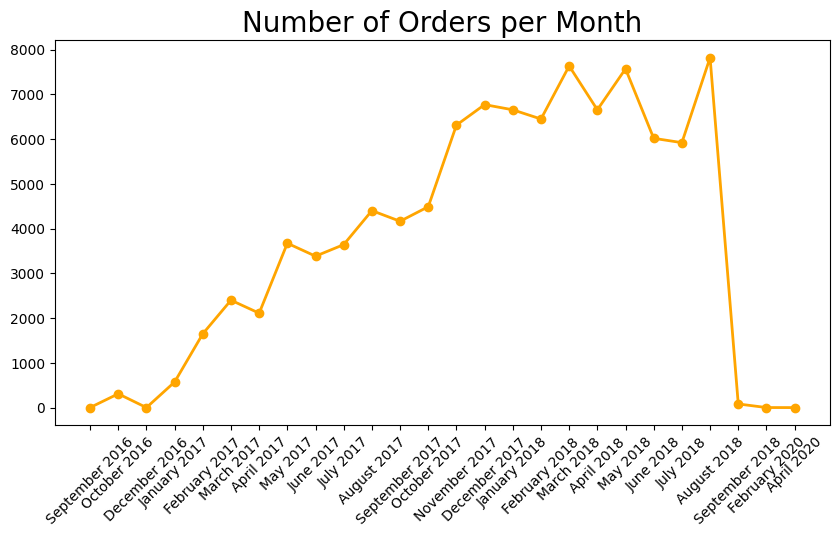

In [142]:
plt.figure(figsize=(10, 5))
plt.plot(
    monthly_orders_df["shipping_limit_date"],
    monthly_orders_df["order_count"],
    marker='o',
    linewidth=2,
    color="orange"
)
plt.title("Number of Orders per Month", loc="center", fontsize=20)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.show()

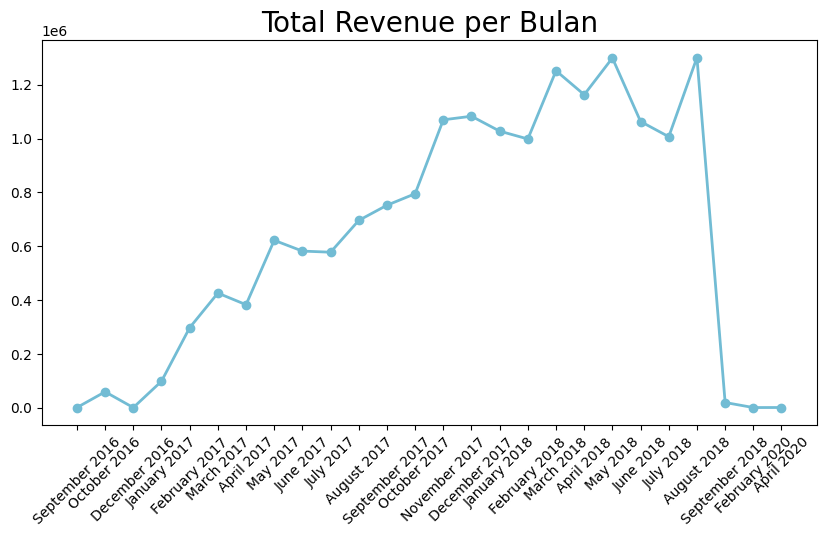

In [143]:
plt.figure(figsize=(10, 5))
plt.plot(
    monthly_orders_df["shipping_limit_date"],
    monthly_orders_df["revenue"],
    marker='o',
    linewidth=2,
    color="#72BCD4"
)
plt.title("Total Revenue per Bulan", loc="center", fontsize=20)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.show()

### Sistem pembayaran apa yang banyak digunakan pelanggan untuk melakukan transaksi?

In [144]:
payments_order_df.sample(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_price,payment_sequential,payment_type,payment_installments,payment_value
42452,5c4c16f0db1537d3ef9e718f12dde7c4,1,56e04ad5959e2c30a6754d9cc1f098f2,d1ef48b38baca7e831711c4a0aeb398f,2018-07-24 11:05:19,38.60,13.61,52.21,1.0,credit_card,4.0,52.21
75409,a490a5d59a9bf4ef3334bfd7cf1dbdfc,1,95e18e6f72e096de84ad972456780aa0,4371b634e0efc0e22b09b52907d9d469,2017-06-22 14:15:17,10.00,7.78,17.78,1.0,credit_card,1.0,17.78
59389,8137dd2eb10f8393185e4fb57b038373,1,2856a85030eb8a2cdb21a8073c679057,562fc2f2c2863ab7e79a9e4388a58a14,2018-08-06 22:35:17,29.99,15.31,45.30,1.0,credit_card,3.0,45.30
114826,fa1965c98f3d6c3a1fe5589129ee48dc,1,422879e10f46682990de24d770e7f83d,1f50f920176fa81dab994f9023523100,2017-10-06 19:05:30,59.90,17.67,77.57,1.0,credit_card,1.0,77.57
68477,95a87e0d2cf1cb63b02eba222ceaecc7,1,3fc18e3aefe7b9346bd15de863fa0365,53e4c6e0f4312d4d2107a8c9cddf45cd,2017-06-08 17:15:10,81.99,16.82,98.81,1.0,credit_card,4.0,98.81


In [145]:
payments_order_df.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False).reset_index().head(10)

,payment_type,order_id
0,credit_card,75991
1,boleto,19614
2,voucher,3766
3,debit_card,1521


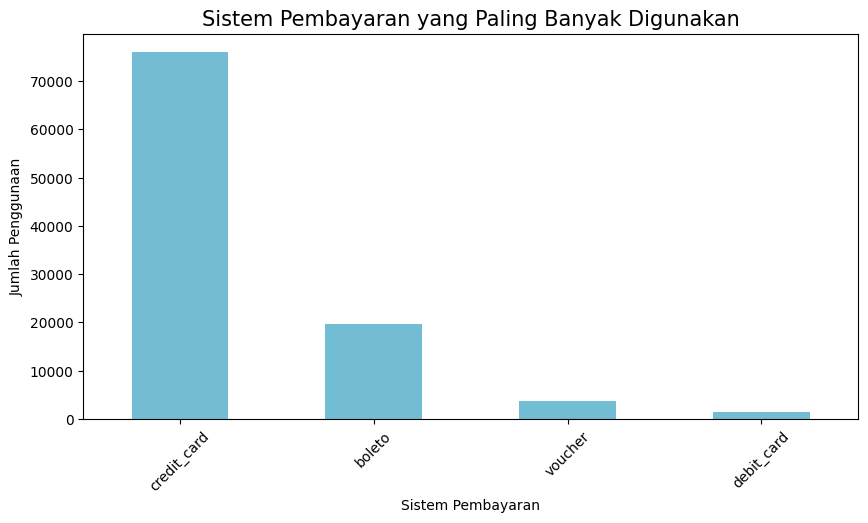

In [146]:
payment_counts = payments_order_df.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False).head(10)

# Visualisasi data dengan grafik batang
plt.figure(figsize=(10, 5))
payment_counts.plot(kind='bar', color='#72BCD4')
plt.title("Sistem Pembayaran yang Paling Banyak Digunakan", fontsize=15)
plt.xlabel("Sistem Pembayaran")
plt.ylabel("Jumlah Penggunaan")
plt.xticks(fontsize=10, rotation=45)
plt.show()

### Conclusion

### Bagaimana performa penjualan dan revenue perusahaan dalam beberapa bulan terakhir?

Dapat disimpulkan bahwa pendapatan dan orderan terbanyak terjadi pada bulan Agustus 2018


In [147]:
print(monthly_orders_df)

   shipping_limit_date  order_count     revenue
0       September 2016            2      218.52
1         October 2016          309    58686.26
3        December 2016            1       19.62
4         January 2017          573    97881.09
5        February 2017         1650   297000.41
6           March 2017         2401   425589.84
7           April 2017         2111   382381.12
8             May 2017         3674   621684.75
9            June 2017         3385   581639.77
10           July 2017         3643   577462.78
11         August 2017         4403   695622.33
12      September 2017         4165   752005.75
13        October 2017         4490   794784.93
14       November 2017         6314  1069480.63
15       December 2017         6772  1082794.50
16        January 2018         6656  1027379.47
17       February 2018         6450   998261.91
18          March 2018         7636  1251831.66
19          April 2018         6656  1162718.95
20            May 2018         7572  129

### Sistem pembayaran apa yang banyak digunakan pelanggan untuk melakukan transaksi?

Dapat diketahui bahwa sistem pembayaran paling banyak digunakan adalah "card_credit"

In [148]:
payments_order_df.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False).reset_index().head(10)

,payment_type,order_id
0,credit_card,75991
1,boleto,19614
2,voucher,3766
3,debit_card,1521
